In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [2]:
#max_distance_loons_df = pd.read_csv("../../../../TFG-GIT/LoonDataStudy/loonData/data/Results/Individual/loonsByDistanceTravelled.csv", index_col='Unnamed: 0')
raw_df =  pd.read_csv("../../../../og_data/extract_clean_with_country.csv", index_col='Unnamed: 0', parse_dates=['ts'])

trips_health = pd.read_csv("../../../../og_data/trips_by_health.csv", index_col='Unnamed: 0')

trips_wingspan = pd.read_csv("../../../../og_data/trips_with_wingspan.csv", index_col='Unnamed: 0', parse_dates=['ts'])


/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
bl = raw_df

In [70]:
# For this study we will have a detailed look on some selected loons
# The candidates are the loons providing service (i.e. during the earthquake in PR).
# Let's look for loons flying over PR the 6 months after loon reporterd sending help '2017-09-20'
pr_trips = bl.loc[(bl.ts > '2017-09-20') & (bl.ts < '2018-03-20') & (bl.country_code == 'PRI')].trip_id.unique()

# Let's see the healthiness of the flights and take a look at them on kepler
pr_trips = trips_health.loc[trips_health.trip_id.isin(pr_trips)].sort_values(by='frequency_var')


In [73]:
# Let's get the first 20 since they have less than one day of requency variance they are healthy enough.
pr_trips.head(20).trip_id.values

array(['HBAL101-A2AB2F', 'HBAL170-A2F676', 'HBAL077-A1A1DB',
       'HBAL091-A22AEB', 'HBAL115-A27632', 'HBAL218-BA148B',
       'HBAL161-A14CCD', 'HBAL083-A16317', 'HBAL093-A14CCD',
       'HBAL209-BA1493', 'HBAL192-BA1492', 'HBAL096-A26756',
       'HBAL047-A22EA2', 'HBAL026-BA144D', 'HBAL048-A09D9C',
       'HBAL023-BA1472', 'HBAL114-A2639F', 'HBAL017-BA143D',
       'HBAL036-BA147A', 'HBAL156-BA1475'], dtype=object)

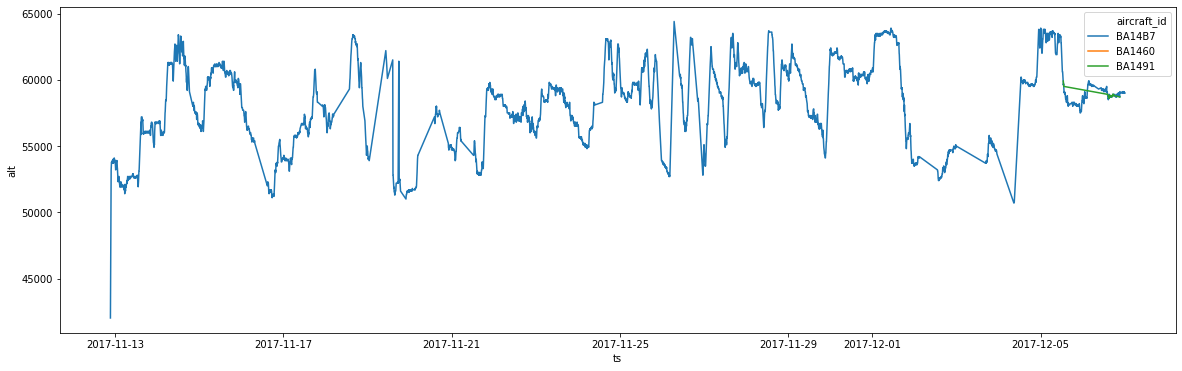

In [24]:
# How does the altitude relate to time?

# This flights don't show anyhting relevant on a general graph ['HBAL029', 'HBAL034', 'HBAL045', 'HBAL027']

# My approach is to take HBAL045 from 11/14/17 to 11/30/17 since we have data for the key moments: 
# Enters PR: 11/14/17
# Floats over it (providing service): 11/20/17
# Leaves PR: 11/29/17
register_matplotlib_converters()
# Let's take a wider window
serving_loon_alt_1 = bl.loc[(bl.flight_id == 'HBAL045') \
                           & (bl.ts > '2017-11-01') & (bl.ts < '2017-12-15')]


plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loon_alt_1['ts'], y="alt", hue='aircraft_id', data=serving_loon_alt_1)

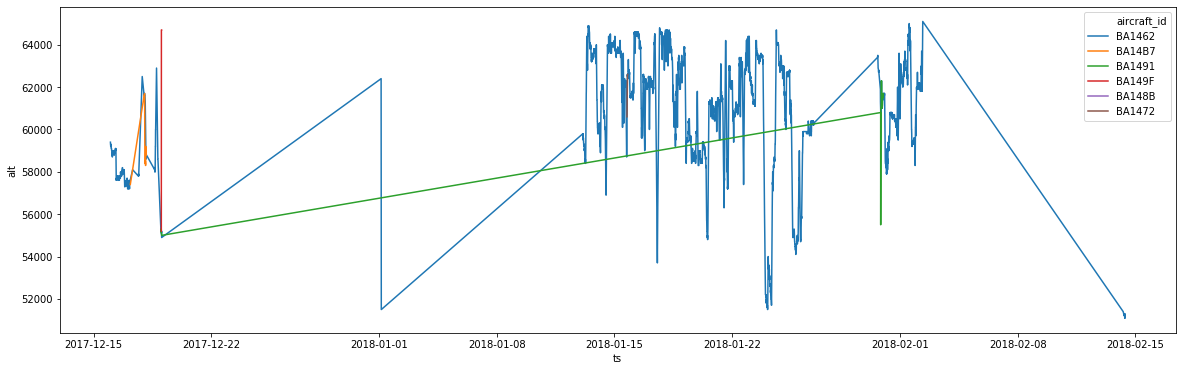

In [25]:
# How does the altitude relate to time?

# Take HBAL027 from 01/06/18 to 01/31/18 since we have data for the key moments: 
# Enters PR: Appears here already (01/06/18)
# Floats over it (providing service): 01/06/18
# Leaves PR: 01/24/18

# Let's take a wider window
serving_loon_alt_2 = bl.loc[(bl.flight_id == 'HBAL027') \
                           & (bl.ts > '2017-12-16') & (bl.ts < '2018-02-15')]

plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loon_alt_2['ts'], y="alt", hue='aircraft_id', data=serving_loon_alt_2)

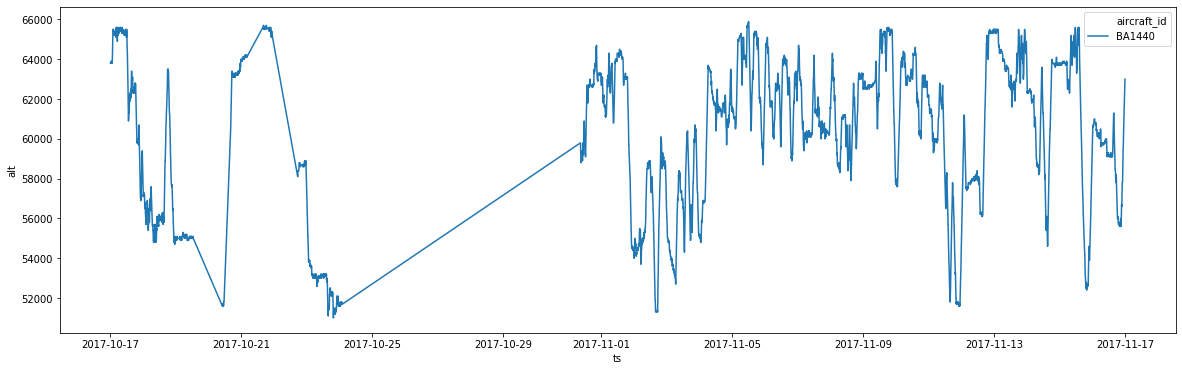

In [26]:
# How does the altitude relate to time?

# Take HBAL029 from 10/30/17 to 11/13/17 since we have data for the key moments: 
# Enters PR: 10/30/17
# Floats over it (providing service): 11/02/17
# Leaves PR: 11/11/17

serving_loon_alt_3 = bl.loc[(bl.flight_id == 'HBAL029') \
                           & (bl.ts > '2017-10-17') & (bl.ts < '2017-11-17')]

plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loon_alt_3['ts'], y="alt", hue='aircraft_id', data=serving_loon_alt_3)

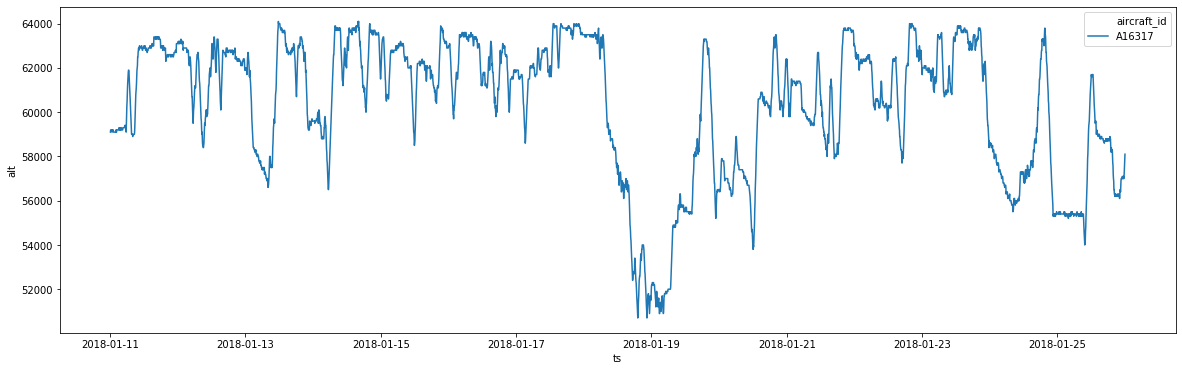

In [27]:
# How does the altitude relate to time?

# Take HBAL097 from 01/10/18 to 01/26/18 since we have data for the key moments: 
# Enters PR: 01/06/18
# Floats over it (providing service): 01/14/18 or 01/17/18 (deviates a lot)
# Leaves PR: 01/23/18

serving_loon_alt_4 = bl.loc[(bl.flight_id == 'HBAL097') \
                           & (bl.ts > '2018-01-10') & (bl.ts < '2018-01-26')]

plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loon_alt_4['ts'], y="alt", hue='aircraft_id', data=serving_loon_alt_4)

In [28]:
# How does wingspan behave?
# When the loon is stationary it will remains close to constant

In [49]:
trips_wingspan

,ts,lat,lon,flight_id,aircraft_id,year,month,day,trip_id,epicentre_wingspan,prev_lat,prev_lon,daily_wingspan,monthly_wingspan
0,2016-07-15,44.7567,-113.6905,HBAL417,BA1102,2016,7,15,HBAL417-BA1102,0.000000,NaN,NaN,0.000000,0.000000
0,2016-07-15,33.7090,-123.5390,HBAL345,BA107B,2016,7,15,HBAL345-BA107B,0.000000,NaN,NaN,0.000000,0.000000
0,2016-07-15,18.2438,-65.6454,HBAL429,BA1127,2016,7,15,HBAL429-BA1127,0.000000,NaN,NaN,0.000000,0.000000
0,2016-07-15,-7.3076,-78.5334,HBAL305,BA1007,2016,7,15,HBAL305-BA1007,0.000000,NaN,NaN,0.000000,0.000000
0,2016-07-15,18.2435,-65.6436,HBAL430,BA1121,2016,7,15,HBAL430-BA1121,0.000000,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2019-10-07,31.7795,-61.1488,HBAL032,A2BA0B,2019,10,7,HBAL032-A2BA0B,56.935939,38.0354,-71.4803,12.077921,56.935939
5,2019-10-07,38.8865,-85.1632,HBAL0342,A2609D,2019,10,7,HBAL0342-A2609D,20.220611,36.9609,-93.3978,8.456747,14.281139
70,2019-10-07,-2.1530,-62.9325,HBAL711,A16317,2019,10,7,HBAL711-A16317,20.465584,2.9212,-60.4853,5.633497,5.270868
12,2019-10-07,-10.8524,99.4872,HBAL789,A23869,2019,10,7,HBAL789-A23869,167.780042,-10.0930,98.0501,1.625406,1.625406


In [50]:
# Take HBAL218 from 11/01/17 to 11/12/17
trips_wingspan.loc[(trips_wingspan.flight_id == 'HBAL218') \
                    & (trips_wingspan.ts > '2017-10-15') \
                    & (trips_wingspan.ts < '2017-12-01')].groupby('trip_id').count()

,ts,lat,lon,flight_id,aircraft_id,year,month,day,epicentre_wingspan,prev_lat,prev_lon,daily_wingspan,monthly_wingspan
trip_id,,,,,,,,,,,,,
HBAL218-BA13EB,20,20,20,20,20,20,20,20,20,20,20,20,20
HBAL218-BA1460,4,4,4,4,4,4,4,4,4,3,3,4,4
HBAL218-BA1462,5,5,5,5,5,5,5,5,5,4,4,5,5
HBAL218-BA1472,4,4,4,4,4,4,4,4,4,3,3,4,4
HBAL218-BA1475,8,8,8,8,8,8,8,8,8,7,7,8,8
HBAL218-BA148B,1,1,1,1,1,1,1,1,1,0,0,1,1


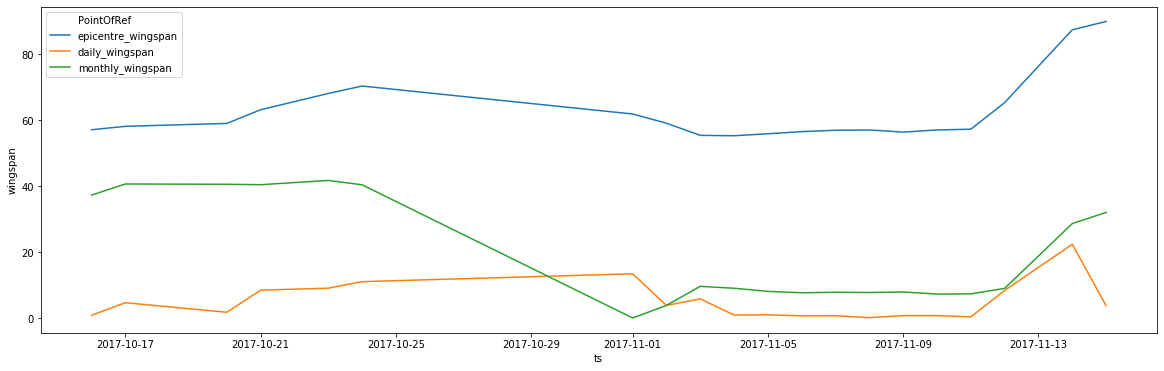

In [56]:
# Take HBAL218-BA13EB from 11/01/17 to 11/12/17
# Enters PR: 11/02/17 
# Floats over it: 11/05/17
# Leaves PR: 11/12/17
serving_loon_wingspan_1 = trips_wingspan.loc[(trips_wingspan.trip_id == 'HBAL218-BA13EB') \
                           & (trips_wingspan.ts > '2017-10-15') & (trips_wingspan.ts < '2017-12-01')]

serving_loon_wingspan_1 = serving_loon_wingspan_1.melt(id_vars=['ts'],\
                                            value_vars=['epicentre_wingspan', 'daily_wingspan', 'monthly_wingspan'],
                                                       var_name='PointOfRef',  value_name='wingspan')
plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loon_wingspan_1['ts'], y='wingspan', hue='PointOfRef', data=serving_loon_wingspan_1)


In [57]:
# Take HBAL029 from 2017-10-31 to 2017-12-04 
trips_wingspan.loc[(trips_wingspan.flight_id == 'HBAL029') \
                    & (trips_wingspan.ts > '2017-10-15') \
                    & (trips_wingspan.ts < '2017-12-20')].groupby('trip_id').count()

,ts,lat,lon,flight_id,aircraft_id,year,month,day,epicentre_wingspan,prev_lat,prev_lon,daily_wingspan,monthly_wingspan
trip_id,,,,,,,,,,,,,
HBAL029-BA1440,57,57,57,57,57,57,57,57,57,57,57,57,57
HBAL029-BA1491,2,2,2,2,2,2,2,2,2,1,1,2,2


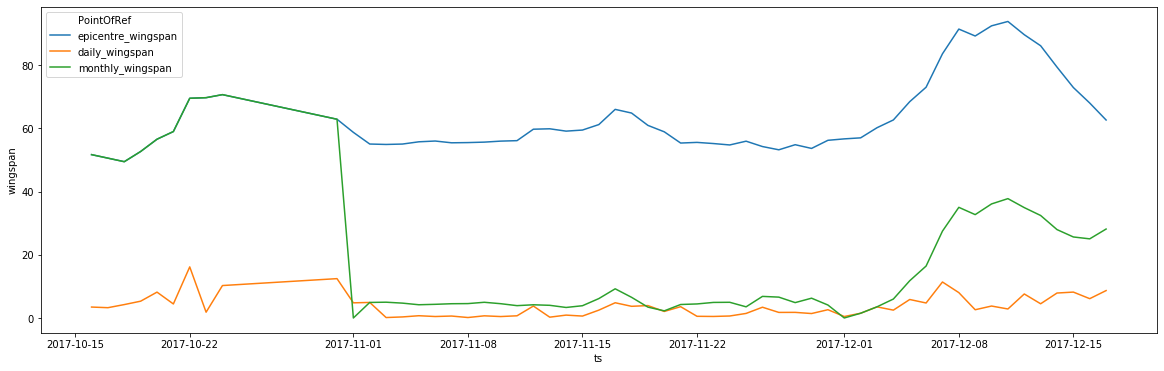

In [63]:
# How does wingspan behave?
# When the loon is stationary it will remains close to constant

# Take HBAL029-BA1440 from 2017-10-31 to 2017-12-04 (comes and goes to close islands in between)
# Enters PR: 2017-11-01
# Floats over it: 2017-11-03
# Leaves PR: 2017-11-11
# Floats over it: 2017-11-21
# Leaves PR: 2017-12-01

serving_loon_wingspan_2 = trips_wingspan.loc[(trips_wingspan.trip_id == 'HBAL029-BA1440') \
                           & (trips_wingspan.ts > '2017-10-15') & (trips_wingspan.ts < '2017-12-20')]

serving_loon_wingspan_2 = serving_loon_wingspan_2.melt(id_vars=['ts'],\
                                            value_vars=['epicentre_wingspan', 'daily_wingspan', 'monthly_wingspan'],
                                                       var_name='PointOfRef',  value_name='wingspan')

plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loon_wingspan_2['ts'], y="wingspan", hue='PointOfRef', data=serving_loon_wingspan_2)


In [64]:
# Take HBAL045 from 2017-11-14 to 2017-12-02
trips_wingspan.loc[(trips_wingspan.flight_id == 'HBAL045') \
                    & (trips_wingspan.ts > '2017-10-15') \
                    & (trips_wingspan.ts < '2017-12-20')].groupby('trip_id').count()

,ts,lat,lon,flight_id,aircraft_id,year,month,day,epicentre_wingspan,prev_lat,prev_lon,daily_wingspan,monthly_wingspan
trip_id,,,,,,,,,,,,,
HBAL045-BA1460,1,1,1,1,1,1,1,1,1,0,0,1,1
HBAL045-BA1491,2,2,2,2,2,2,2,2,2,1,1,2,2
HBAL045-BA14B7,30,30,30,30,30,30,30,30,30,29,29,30,30


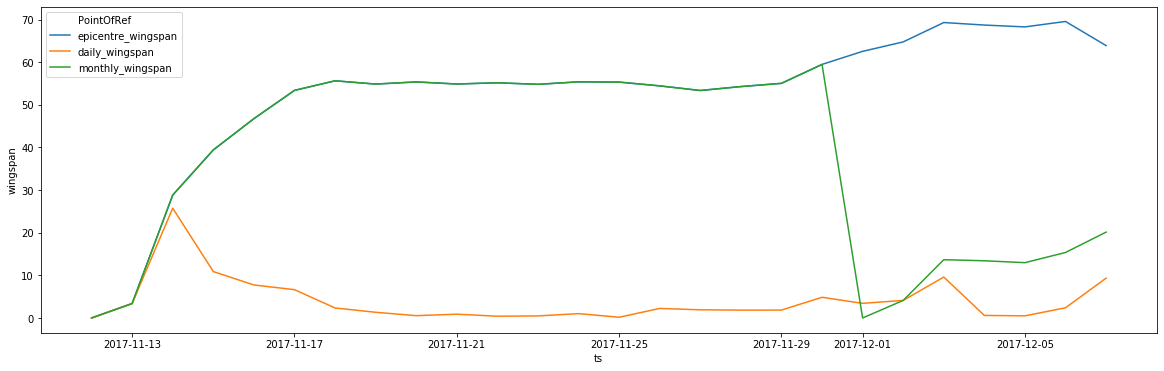

In [66]:
# How does wingspan behave?
# When the loon is stationary it will remains close to constant

# Take HBAL045 from 2017-11-14 to 2017-12-02
# Enters PR: 2017-11-17
# Floats over it: 2017-11-22
# Leaves PR: 2017-11-29

serving_loon_wingspan_3 = trips_wingspan.loc[(trips_wingspan.trip_id == 'HBAL045-BA14B7') \
                           & (trips_wingspan.ts > '2017-11-10') & (trips_wingspan.ts < '2017-12-15')]

serving_loon_wingspan_3 = serving_loon_wingspan_3.melt(id_vars=['ts'],\
                                            value_vars=['epicentre_wingspan', 'daily_wingspan', 'monthly_wingspan'],
                                                       var_name='PointOfRef',  value_name='wingspan')

plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loon_wingspan_3['ts'], y="wingspan", hue='PointOfRef', data=serving_loon_wingspan_3)

In [ ]:
# Looks like the hypothesis holds. Next step should be compute the variability and see how the numeric result behaves.
# Constant wingspan might show stationarity but also an orbital movement around the origin point of the flight 
# Next step should be finding a metric confirming that a loon provides service 
# and also find a way to make sure the object is stationary and it is not "orbiting"

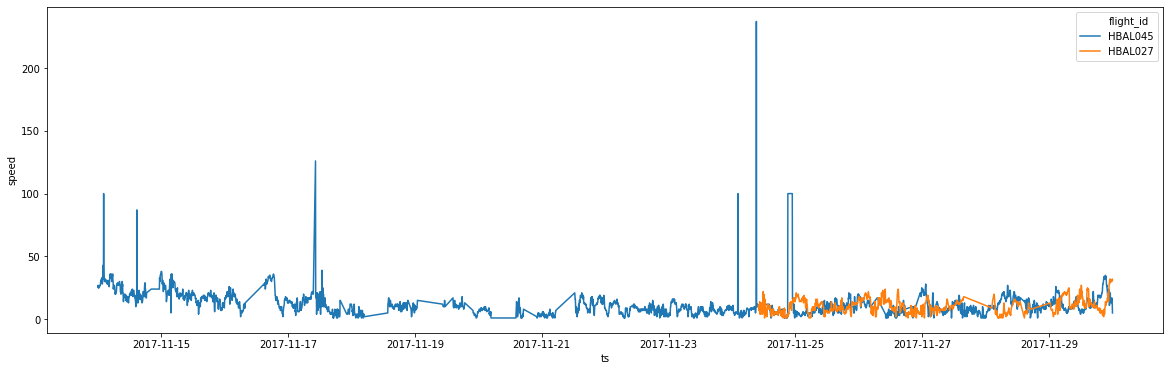

In [130]:
# How does the velocity relate to time?
plt.figure(figsize=(20,6))

sns.lineplot(x=serving_loons['ts'], y="speed", hue='flight_id', data=serving_loons)

In [8]:
'''STUDY 1
# Join both data in one df
bl_red_alt_vel = bl_red_alt

bl_red_alt_vel['speed'] = bl_red_vel['speed']

# To study the regression we compute the time on air (toa)
bl_red_alt_vel['toa'] = bl_red_alt_vel.apply(lambda r: getTimeOnAir(r['aircraft_id'], r['ts'], bl), axis=1)
'''

In [125]:
# To study the regression we compute the time on air (toa)
serving_loons['toa'] = serving_loons.apply(lambda r: getTimeOnAir(r['flight_id'], r['ts'], bl), axis=1)


KeyboardInterrupt: 

In [ ]:
serving_loons.head()

In [ ]:
'''STUDY 1
plt.figure(figsize=(16,6))
for i in range(0,10):
    sns.regplot(x=bl_red_alt_vel[bl_red_alt_vel.aircraft_id==max_distance_loons.loc[i]]['toa'], 
                y=bl_red_alt_vel[bl_red_alt_vel.aircraft_id==max_distance_loons.loc[i]]['speed']).set(xlim=(0))

'''
plt.figure(figsize=(16,6))
for i in range(0,3):
    sns.regplot(x=serving_loons[serving_loons.aircraft_id==pr_flight_ids[i]]['toa'], 
                y=serving_loons[serving_loons.aircraft_id==pr_flight_ids[i]]['speed']).set(xlim=(0))



In [ ]:
plt.figure(figsize=(16,6))

for i in range(0,10):
    sns.regplot(x=bl_red_alt_vel[bl_red_alt_vel.aircraft_id==max_distance_loons.loc[i]]['toa'],
                y=bl_red_alt_vel[bl_red_alt_vel.aircraft_id==max_distance_loons.loc[i]]['alt']).set(xlim=(0))


In [ ]:
plt.figure(figsize=(16,6))

for i in range(0,10):
    sns.regplot(x=bl_red_alt_vel[bl_red_alt_vel.aircraft_id==max_distance_loons.loc[i]]['alt'],
                y=bl_red_alt_vel[bl_red_alt_vel.aircraft_id==max_distance_loons.loc[i]]['speed']).set(xlim=(0))


In [40]:
''' STUDY 1: THE RESULTS FOR THIS STUDY WERE NOT SATISFACTORY
# For this study we only care about the loons who have travelled the longest distances
max_distance_loons = max_distance_loons_df.aircraft_id
#target_ids = ['A2C8E7', '00FEEA']
bl = raw_df.loc[raw_df.aircraft_id.isin(max_distance_loons)]

bl.aircraft_id.value_counts()
'''

" STUDY 1: THE RESULTS FOR THIS STUDY WERE NOT SATISFACTORY\n# For this study we only care about the loons who have travelled the longest distances\nmax_distance_loons = max_distance_loons_df.aircraft_id\n#target_ids = ['A2C8E7', '00FEEA']\nbl = raw_df.loc[raw_df.aircraft_id.isin(max_distance_loons)]\n\nbl.aircraft_id.value_counts()\n"

In [127]:

# Reduces the data to one measurement per day
''' STUDY 1: DID NOT FIND RESULTS'''
def data_reducer(loon_id, feature):
    loon_hist = bl.loc[bl.flight_id == loon_id]
    loon_hist_red = loon_hist[['ts', feature]].set_index(loon_hist['ts']) 

    loon_hist_red['year'] = loon_hist_red.ts.dt.year
    loon_hist_red['month'] = loon_hist_red.ts.dt.month
    loon_hist_red['day'] = loon_hist_red.ts.dt.day

    if feature == "speed":
        loon_hist_red = loon_hist_red.groupby(by=[loon_hist_red.year, loon_hist_red.month, loon_hist_red.day], as_index=False).mean()
    else:
        loon_hist_red = loon_hist_red.groupby(by=[loon_hist_red.year, loon_hist_red.month, loon_hist_red.day], as_index=False).max()
        
    loon_hist_red['ts'] = pd.to_datetime(loon_hist_red[['year','month','day']])
    loon_hist_red['flight_id'] = loon_id
    return loon_hist_red
''''''

def getTimeOnAir(a_id, curr_ts, df):
    first_ts = df.loc[df.flight_id == a_id, ['ts']].min()
    #Units are days
    first_ts = first_ts.dt.normalize()
    time_on_air = curr_ts - first_ts
    #print('first_ts: '+str(first_ts))
    #print('time_on_air: '+str(time_on_air))
    #print('curr_ts: '+str(curr_ts))
    return time_on_air.dt.total_seconds()
    

In [128]:
''' STUDY 1: DID NOT FIND RESULTS
# Since the data takes too long to analyze we will use take a reduced samples

bl_red_vel = pd.DataFrame()

for i in kepler_candidate_flights:
    df = data_reducer(i, 'speed')
    bl_red_vel = bl_red_vel.append(df)
    
bl_red_vel = bl_red_vel.reindex(['ts', 'year', 'month', 'day', 'flight_id', 'speed'], axis=1)

bl_red_alt = pd.DataFrame()

for i in kepler_candidate_flights:
    df = data_reducer(i, 'alt')
    bl_red_alt = bl_red_alt.append(df)

bl_red_alt = bl_red_alt.reindex(['ts', 'year', 'month', 'day', 'flight_id', 'alt'], axis=1)
'''

" STUDY 1: DID NOT FIND RESULTS\n# Since the data takes too long to analyze we will use take a reduced samples\n\nbl_red_vel = pd.DataFrame()\n\nfor i in kepler_candidate_flights:\n    df = data_reducer(i, 'speed')\n    bl_red_vel = bl_red_vel.append(df)\n    \nbl_red_vel = bl_red_vel.reindex(['ts', 'year', 'month', 'day', 'flight_id', 'speed'], axis=1)\n\nbl_red_alt = pd.DataFrame()\n\nfor i in kepler_candidate_flights:\n    df = data_reducer(i, 'alt')\n    bl_red_alt = bl_red_alt.append(df)\n\nbl_red_alt = bl_red_alt.reindex(['ts', 'year', 'month', 'day', 'flight_id', 'alt'], axis=1)\n"